In [1]:
!pip install pandas numpy requests beautifulsoup4 textblob scikit-learn nltk joblib matplotlib wordcloud
!python -m textblob.download_corpora


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.8 MB/s  0:00:00
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.5

   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
    Uninstalling numpy-2.3.5:
   ---------------------------------------- 0/3 [numpy]
      Successfully uninstalled numpy-2.3.5
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   -----

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [2]:
import os

# Define project structure
folders = ["data", "models", "figures"]
files = ["Sentiment_Analysis.ipynb", "requirements.txt"]

# Create main folder
project_path = r"C:\SentimentProject"
os.makedirs(project_path, exist_ok=True)

# Create subfolders
for folder in folders:
    os.makedirs(os.path.join(project_path, folder), exist_ok=True)

# Create empty files
for file in files:
    open(os.path.join(project_path, file), 'a').close()

print("Project structure created successfully!")


Project structure created successfully!


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

# make sure the folder exists
os.makedirs("data", exist_ok=True)

# scrape
url = "https://news.ycombinator.com/"
r = requests.get(url, timeout=10)
soup = BeautifulSoup(r.text, "html.parser")

titles = [item.get_text(strip=True) for item in soup.select(".titleline")]

# create dataframe
df = pd.DataFrame({"text": titles})

# ✅ correct save line
df.to_csv("data/IMDB_Dataset.csv", index=False, encoding="utf-8")

df.head()



,text
0,"Cloudflare outage on November 18, 2025 post mo..."
1,Gemini 3(blog.google)
2,Blender 5.0(blender.org)
3,Google Antigravity(antigravity.google)
4,"Pebble, Rebble, and a path forward(ericmigi.com)"


In [4]:
import re

def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+|www\S+', '', s)
    s = re.sub(r'[^A-Za-z0-9\s\.\,]', '', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['text_clean'] = df['text'].apply(clean_text)
df.to_csv("data/IMDB_Dataset.csv", index=False, encoding="utf-8")
df.head()


,text,text_clean
0,"Cloudflare outage on November 18, 2025 post mo...","Cloudflare outage on November 18, 2025 post mo..."
1,Gemini 3(blog.google),Gemini 3blog.google
2,Blender 5.0(blender.org),Blender 5.0blender.org
3,Google Antigravity(antigravity.google),Google Antigravityantigravity.google
4,"Pebble, Rebble, and a path forward(ericmigi.com)","Pebble, Rebble, and a path forwardericmigi.com"


In [5]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['polarity'] = df['text_clean'].apply(get_sentiment)
df['label'] = df['polarity'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df.to_csv("data/sentiment_text.csv", index=False, encoding="utf-8")
df.head(10)



,text,text_clean,polarity,label
0,"Cloudflare outage on November 18, 2025 post mo...","Cloudflare outage on November 18, 2025 post mo...",0.0,neutral
1,Gemini 3(blog.google),Gemini 3blog.google,0.0,neutral
2,Blender 5.0(blender.org),Blender 5.0blender.org,0.0,neutral
3,Google Antigravity(antigravity.google),Google Antigravityantigravity.google,0.0,neutral
4,"Pebble, Rebble, and a path forward(ericmigi.com)","Pebble, Rebble, and a path forwardericmigi.com",0.0,neutral
5,Gemini 3 Pro Model Card [pdf](storage.googleap...,Gemini 3 Pro Model Card pdfstorage.googleapis.com,0.0,neutral
6,GitHub: Git operation failures(githubstatus.com),GitHub Git operation failuresgithubstatus.com,0.0,neutral
7,The code and open-source tools I used to produ...,The code and opensource tools I used to produc...,0.0,neutral
8,Ford can't find mechanics for $120K: It takes ...,Ford cant find mechanics for 120K It takes mat...,0.0,neutral
9,OrthoRoute – GPU-accelerated autorouting for K...,OrthoRoute GPUaccelerated autorouting for KiCa...,0.0,neutral


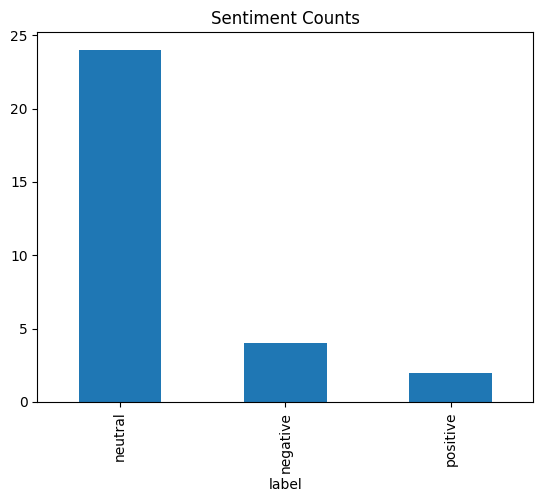

In [6]:
df['label'].value_counts().plot(kind='bar', title='Sentiment Counts');


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df_model = df[df['label'] != 'neutral']
X = df_model['text_clean']
y = df_model['label'].map({'positive':1, 'negative':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))



Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\admin\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3

In [9]:
import os
import joblib

# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

df.to_csv("data/final_sentiment.csv", index=False)

joblib.dump(model, "models/sentiment_model.pkl")
joblib.dump(vec, "models/tfidf.pkl")


['models/tfidf.pkl']

In [10]:
import joblib

df.to_csv("data/final_sentiment.csv", index=False)
joblib.dump(model, "models/sentiment_model.pkl")
joblib.dump(vec, "models/tfidf.pkl")



['models/tfidf.pkl']

In [11]:
pip install azure-storage-blob



   ------------- -------------------------- 1/3 [azure-core]
   ------------- -------------------------- 1/3 [azure-core]
   ------------- -------------------------- 1/3 [azure-core]
   -------------------------- ------------- 2/3 [azure-storage-blob]
   -------------------------- ------------- 2/3 [azure-storage-blob]
   -------------------------- ------------- 2/3 [azure-storage-blob]
   -------------------------- ------------- 2/3 [azure-storage-blob]
   -------------------------- ------------- 2/3 [azure-storage-blob]
   ---------------------------------------- 3/3 [azure-storage-blob]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# create a "data" folder beside your notebook if it doesn't exist
os.makedirs("data", exist_ok=True)

print("Current folder:", os.getcwd())
print("Contents:", os.listdir())


Current folder: C:\Users\admin
Contents: ['.anaconda', '.azcopy', '.azuredatastudio', '.cache', '.conda', '.condarc', '.continuum', '.docker', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.venv', '.virtual_documents', '.vscode', '.~OpenCV_Exercise.ipynb', 'anaconda3', 'AppData', 'Application Data', 'connect_to_cassandra.py', 'Contacts', 'Cookies', 'data', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Microsoft', 'models', 'Modified_Blackjack_RL_Aishwariya (1).ipynb', 'Music', 'My Documents', 'NetHood', 'neural network ass2.ipynb', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{918762ff-44ac-11f0-bdd6-ddb2b3c71b4f}.TM.blf', 'NTUSER.DAT{918762ff-44ac-11f0-bdd6-ddb2b3c71b4f}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{918762ff-44ac-11f0-bdd6-ddb2b3c71b4f}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'OpenCV_Exercise_gurleen.ipynb', 'outpu

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

os.makedirs("data", exist_ok=True)

# 1) Scrape headlines from Hacker News
url = "https://news.ycombinator.com/"
r = requests.get(url, timeout=10)
soup = BeautifulSoup(r.text, "html.parser")

titles = [item.get_text(strip=True) for item in soup.select(".titleline")]

# 2) Put into a DataFrame
df = pd.DataFrame({"text": titles})

# 3) Save FIRST VERSION of the csv
df.to_csv("data/news_raw.csv", index=False, encoding="utf-8")

df.head()


,text
0,Questions for Cloudflare(entropicthoughts.com)
1,Emoji Evidence Errors Don't Undo a Murder Conv...
2,Launch HN: Mosaic (YC W25) – Agentic Video Edi...
3,Programming the Commodore 64 with .NET(retroc6...
4,"Your Smartphone, Their Rules: App Stores Enabl..."


In [5]:
import os
print(os.listdir("data"))

['final_sentiment.csv', 'IMDB_Dataset.csv', 'MNIST', 'news_raw.csv', 'sentiment_text.csv']


In [6]:
import re
from textblob import TextBlob
import numpy as np

# Clean text a bit
def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+|www\S+', '', s)          # remove links
    s = re.sub(r'[^A-Za-z0-9\s\.\,]', '', s)     # keep basic chars
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df["text_clean"] = df["text"].apply(clean_text)

# Sentiment score using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity   # between -1 (neg) and +1 (pos)

df["sentiment_score"] = df["text_clean"].apply(get_sentiment)

# Label as positive / negative / neutral
df["sentiment_label"] = np.where(
    df["sentiment_score"] > 0.1, "positive",
    np.where(df["sentiment_score"] < -0.1, "negative", "neutral")
)

# Save FINAL CSV
df.to_csv("data/final_sentiment.csv", index=False, encoding="utf-8")

df.head()


,text,text_clean,sentiment_score,sentiment_label
0,Questions for Cloudflare(entropicthoughts.com),Questions for Cloudflareentropicthoughts.com,0.0,neutral
1,Emoji Evidence Errors Don't Undo a Murder Conv...,Emoji Evidence Errors Dont Undo a Murder Convi...,0.0,neutral
2,Launch HN: Mosaic (YC W25) – Agentic Video Edi...,Launch HN Mosaic YC W25 Agentic Video Editingm...,0.0,neutral
3,Programming the Commodore 64 with .NET(retroc6...,Programming the Commodore 64 with .NETretroc64...,0.0,neutral
4,"Your Smartphone, Their Rules: App Stores Enabl...","Your Smartphone, Their Rules App Stores Enable...",0.0,neutral


In [8]:
print(os.listdir("data"))
      

['final_sentiment.csv', 'IMDB_Dataset.csv', 'MNIST', 'news_raw.csv', 'sentiment_text.csv']


In [9]:
sent_df = pd.read_csv("data/final_sentiment.csv")
sent_df.head()


,text,text_clean,sentiment_score,sentiment_label
0,Questions for Cloudflare(entropicthoughts.com),Questions for Cloudflareentropicthoughts.com,0.0,neutral
1,Emoji Evidence Errors Don't Undo a Murder Conv...,Emoji Evidence Errors Dont Undo a Murder Convi...,0.0,neutral
2,Launch HN: Mosaic (YC W25) – Agentic Video Edi...,Launch HN Mosaic YC W25 Agentic Video Editingm...,0.0,neutral
3,Programming the Commodore 64 with .NET(retroc6...,Programming the Commodore 64 with .NETretroc64...,0.0,neutral
4,"Your Smartphone, Their Rules: App Stores Enabl...","Your Smartphone, Their Rules App Stores Enable...",0.0,neutral


In [10]:
import os
os.getcwd(), os.listdir(), os.listdir("data")


('C:\\Users\\admin',
 ['.anaconda',
  '.azcopy',
  '.azuredatastudio',
  '.cache',
  '.conda',
  '.condarc',
  '.continuum',
  '.docker',
  '.idlerc',
  '.ipynb_checkpoints',
  '.ipython',
  '.jupyter',
  '.keras',
  '.matplotlib',
  '.venv',
  '.virtual_documents',
  '.vscode',
  '.~OpenCV_Exercise.ipynb',
  'anaconda3',
  'AppData',
  'Application Data',
  'connect_to_cassandra.py',
  'Contacts',
  'Cookies',
  'data',
  'Desktop',
  'Documents',
  'Downloads',
  'Favorites',
  'IntelGraphicsProfiles',
  'Links',
  'Local Settings',
  'Microsoft',
  'models',
  'Modified_Blackjack_RL_Aishwariya (1).ipynb',
  'Music',
  'My Documents',
  'NetHood',
  'neural network ass2.ipynb',
  'NTUSER.DAT',
  'ntuser.dat.LOG1',
  'ntuser.dat.LOG2',
  'NTUSER.DAT{918762ff-44ac-11f0-bdd6-ddb2b3c71b4f}.TM.blf',
  'NTUSER.DAT{918762ff-44ac-11f0-bdd6-ddb2b3c71b4f}.TMContainer00000000000000000001.regtrans-ms',
  'NTUSER.DAT{918762ff-44ac-11f0-bdd6-ddb2b3c71b4f}.TMContainer00000000000000000002.regtrans-m